## https://github.com/1adrianb/face-alignment

In [1]:
import face_alignment
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import imutils

from pathlib import Path
from face_alignment.detection.blazeface import blazeface_detector

In [2]:
#IMG_PATH = '/home/phdomingues/masters/data/UNIFESP/all/05_110222.bmp'
#MASK_PATH = '/home/phdomingues/masters/results/UNIFESP360/sam/05_110222.png'

IMG_PATH = '/home/phdomingues/masters/data/datasets/Occlusion/images/f3.jpg'
MASK_PATH = '/home/phdomingues/masters/results/Occlusion/sam/f3.png'

In [3]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cuda', face_detector='blazeface')
fd = blazeface_detector.BlazeFaceDetector(device='cuda')

In [4]:
img = cv2.imread(IMG_PATH)

mask = cv2.imread(str(MASK_PATH),0)
img_masked = cv2.bitwise_and(img, img, mask=mask)

#img = imutils.resize(img, 300)
#img_masked = imutils.resize(img_masked, 300)

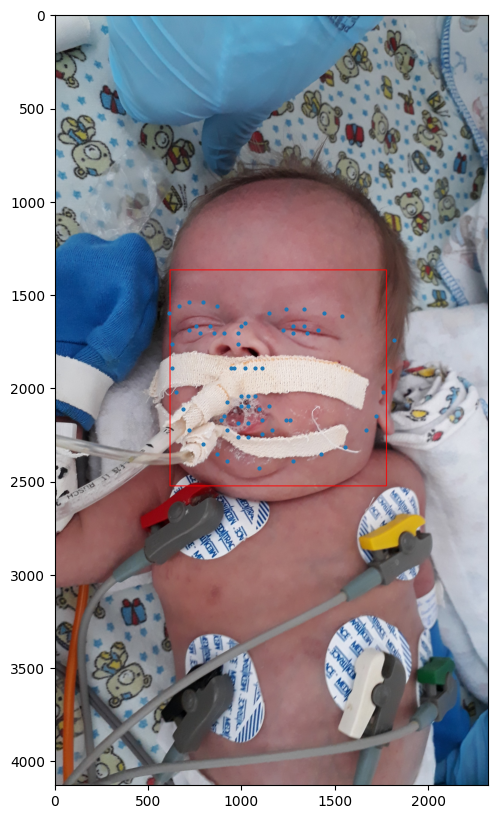

In [5]:
# Detect bounding box
boxes = fd.detect_from_image(img)

# Copy the original image for display purpose
display_img = img.copy()

# Draw the bounding box detected
for box in boxes:
    display_img = cv2.rectangle(display_img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0,0,255), 4)

# Detect keypoints
keypoints = fa.get_landmarks_from_image(img, boxes)

# Plot 
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(cv2.cvtColor(display_img, cv2.COLOR_BGR2RGB))
for points in keypoints:
    ax.scatter(points[:,0], points[:,1], 4)

plt.show()

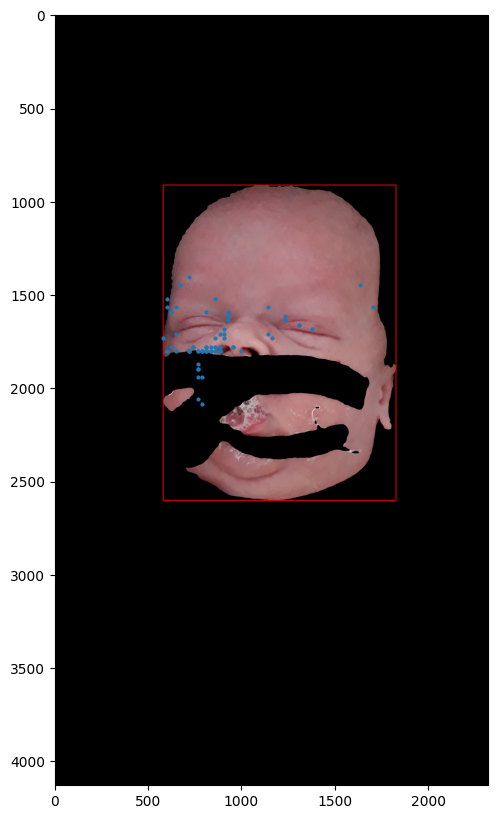

In [6]:
# Detect bounding box
idxs = cv2.cvtColor(img_masked, cv2.COLOR_RGB2GRAY).nonzero()
top = idxs[0].min()
bottom = idxs[0].max()
left = idxs[1].min()
right = idxs[1].max()
boxes_masked = [[left, top, right, bottom]]

# Copy the original image for display purpose
display_img_masked = img_masked.copy()

# Draw the bounding box detected
for box in boxes_masked:
    display_img_masked = cv2.rectangle(display_img_masked, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0,0,255), 4)

# Detect keypoints
keypoints_masked = fa.get_landmarks_from_image(img_masked, boxes_masked)

# Plot 
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.imshow(cv2.cvtColor(display_img_masked, cv2.COLOR_BGR2RGB))
for points in keypoints_masked:
    ax2.scatter(points[:,0], points[:,1], 4)

plt.show()